In [2]:
#Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

1. X·ª≠ l√Ω d·ªØ li·ªáu

In [23]:
#DataFrame
df = pd.read_excel("/Users/hoangvupham/Desktop/KHDL mar/Online_Retail.xlsx")
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [24]:
# Chuy·ªÉn ƒë·ªïi c·ªôt 'InvoiceDate' sang d·∫°ng datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')

# L·ªçc d·ªØ li·ªáu t·ª´ th√°ng 5 ƒë·∫øn th√°ng 9 (bao g·ªìm c·∫£ hai th√°ng)
df = df[df['InvoiceDate'].dt.month.between(5, 9)]

# Hi·ªÉn th·ªã v√†i d√≤ng ƒë·∫ßu c·ªßa dataframe ƒë√£ l·ªçc
df.head()

InvoiceNo StockCode                        Description  Quantity  \
171999    551515     21731      RED TOADSTOOL LED NIGHT LIGHT        12   
172000    551515     20749         ASSORTED COLOUR MINI CASES        12   
172001    551515     22729        ALARM CLOCK BAKELIKE ORANGE         8   
172002    551515     22998       TRAVEL CARD WALLET KEEP CALM        24   
172003    551515     22665  RECIPE BOX BLUE SKETCHBOOK DESIGN        24   

               InvoiceDate  UnitPrice  CustomerID         Country  
171999 2011-05-01 10:51:00       1.65     15606.0  United Kingdom  
172000 2011-05-01 10:51:00       6.35     15606.0  United Kingdom  
172001 2011-05-01 10:51:00       3.75     15606.0  United Kingdom  
172002 2011-05-01 10:51:00       0.42     15606.0  United Kingdom  
172003 2011-05-01 10:51:00       2.55     15606.0  United Kingdom

In [25]:
#L·ªçc c√°c d·ªØ li·ªáu Quantity v√† UnitPrice 
df = df[df['Quantity']>0]
df = df[df['UnitPrice']>0]

In [26]:
#Ki·ªÉm tra d√≤ng ƒë·∫ßu v√† d√≤ng cu·ªëi c·ªßa df m·ªõi ƒë·ªÉ ki·ªÉm tra th·ªùi gian
first_row = df.head(1)
last_row = df.tail(1)

first_row, last_row

(       InvoiceNo StockCode                    Description  Quantity  \
 171999    551515     21731  RED TOADSTOOL LED NIGHT LIGHT        12   
 
                InvoiceDate  UnitPrice  CustomerID         Country  
 171999 2011-05-01 10:51:00       1.65     15606.0  United Kingdom  ,
        InvoiceNo StockCode                         Description  Quantity  \
 370930    569202     22805  BLUE DRAWER KNOB ACRYLIC EDWARDIAN        10   
 
                InvoiceDate  UnitPrice  CustomerID         Country  
 370930 2011-09-30 17:22:00       1.25         NaN  United Kingdom  )

In [27]:
#Ki·ªÉm tra s·ªë l∆∞·ª£ng CustomerID b·ªã NaN
df['CustomerID'].isna().sum()
df.loc[df['CustomerID'].isna()].head()

InvoiceNo StockCode                         Description  Quantity  \
172451    551536    85123A  WHITE HANGING HEART T-LIGHT HOLDER         1   
172452    551536    85129D     BEADED CRYSTAL HEART PINK SMALL         1   
172453    551537     21499                  BLUE POLKADOT WRAP         2   
172454    551537     21086         SET/6 RED SPOTTY PAPER CUPS         2   
172455    551537     21094       SET/6 RED SPOTTY PAPER PLATES         2   

               InvoiceDate  UnitPrice  CustomerID         Country  
172451 2011-05-03 08:35:00       2.95         NaN  United Kingdom  
172452 2011-05-03 08:35:00       1.25         NaN  United Kingdom  
172453 2011-05-03 08:37:00       0.42         NaN  United Kingdom  
172454 2011-05-03 08:37:00       0.65         NaN  United Kingdom  
172455 2011-05-03 08:37:00       0.85         NaN  United Kingdom

In [28]:
#Lo·∫°i b·ªè CustomerID b·ªã NaN
df = df.dropna(subset=['CustomerID'])
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149365 entries, 171999 to 370679
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    149365 non-null  object        
 1   StockCode    149365 non-null  object        
 2   Description  149365 non-null  object        
 3   Quantity     149365 non-null  int64         
 4   InvoiceDate  149365 non-null  datetime64[ns]
 5   UnitPrice    149365 non-null  float64       
 6   CustomerID   149365 non-null  float64       
 7   Country      149365 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 10.3+ MB


In [29]:
#L∆∞u df sau khi x·ª≠ l√Ω d∆∞·ªõi dang csv
df.to_csv("/Users/hoangvupham/Desktop/KHDL mar/Data_G5_Cleaned.csv")

2. Kh√°m ph√° d·ªØ li·ªáu

In [4]:
df = pd.read_csv(r'D:\Data-driven Marketing\Data_G5_Cleaned.csv')
df.head()

InvoiceNo StockCode                        Description  Quantity  \
0     551515     21731      RED TOADSTOOL LED NIGHT LIGHT        12   
1     551515     20749         ASSORTED COLOUR MINI CASES        12   
2     551515     22729        ALARM CLOCK BAKELIKE ORANGE         8   
3     551515     22998       TRAVEL CARD WALLET KEEP CALM        24   
4     551515     22665  RECIPE BOX BLUE SKETCHBOOK DESIGN        24   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  5/1/2011 10:51       1.65       15606  United Kingdom  
1  5/1/2011 10:51       6.35       15606  United Kingdom  
2  5/1/2011 10:51       3.75       15606  United Kingdom  
3  5/1/2011 10:51       0.42       15606  United Kingdom  
4  5/1/2011 10:51       2.55       15606  United Kingdom

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149365 entries, 0 to 149364
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    149365 non-null  int64  
 1   StockCode    149365 non-null  object 
 2   Description  149365 non-null  object 
 3   Quantity     149365 non-null  int64  
 4   InvoiceDate  149365 non-null  object 
 5   UnitPrice    149365 non-null  float64
 6   CustomerID   149365 non-null  int64  
 7   Country      149365 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 9.1+ MB


In [6]:
sns.set(style="whitegrid")

In [7]:
#T·∫°o c·ªôt t·ªïng ti·ªÅn cho m·ªói d√≤ng
df["TotalPrice"]=df["Quantity"]*df["UnitPrice"]

In [8]:
#1.Top s·∫£n ph·∫©m b√°n ch·∫°y
top_products = (
    df.groupby("Description")["Quantity"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

print("Top 10 s·∫£n ph·∫©m b√°n ch·∫°y nh·∫•t:\n", top_products)

Top 10 s·∫£n ph·∫©m b√°n ch·∫°y nh·∫•t:
 Description
JUMBO BAG RED RETROSPOT               19424
WORLD WAR 2 GLIDERS ASSTD DESIGNS     16182
ASSORTED COLOUR BIRD ORNAMENT         15764
PACK OF 72 RETROSPOT CAKE CASES       13736
WHITE HANGING HEART T-LIGHT HOLDER    12925
PACK OF 60 PINK PAISLEY CAKE CASES    12273
ASSORTED COLOURS SILK FAN             12024
POPCORN HOLDER                        11467
BROCADE RING PURSE                    10635
MINI PAINT SET VINTAGE                10049
Name: Quantity, dtype: int64


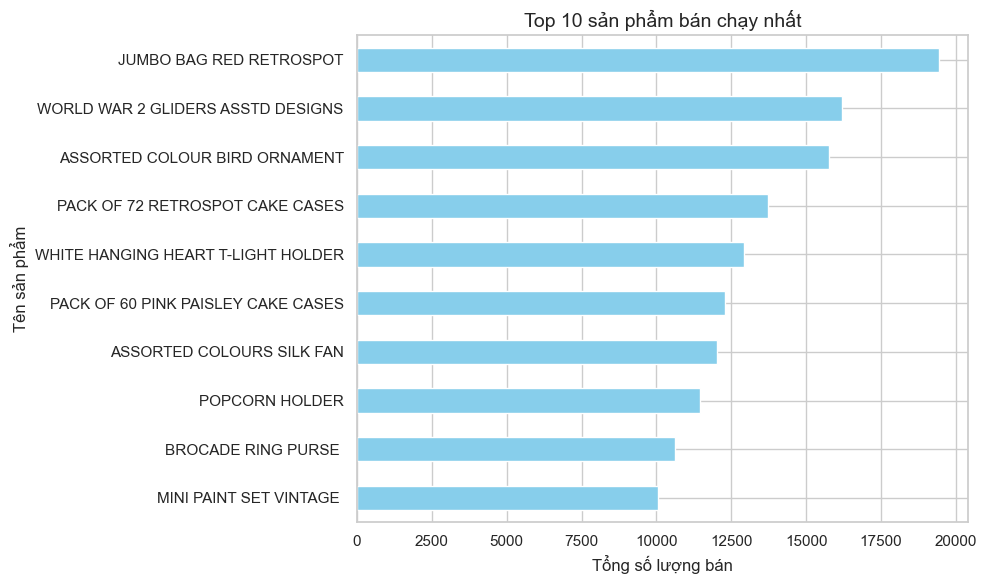

In [9]:
# ----- 1. Bi·ªÉu ƒë·ªì: Top 10 s·∫£n ph·∫©m b√°n ch·∫°y -----
plt.figure(figsize=(10, 6))
top_products.sort_values().plot(kind='barh', color='skyblue')
plt.title("Top 10 s·∫£n ph·∫©m b√°n ch·∫°y nh·∫•t", fontsize=14)
plt.xlabel("T·ªïng s·ªë l∆∞·ª£ng b√°n")
plt.ylabel("T√™n s·∫£n ph·∫©m")
plt.tight_layout()
plt.show()

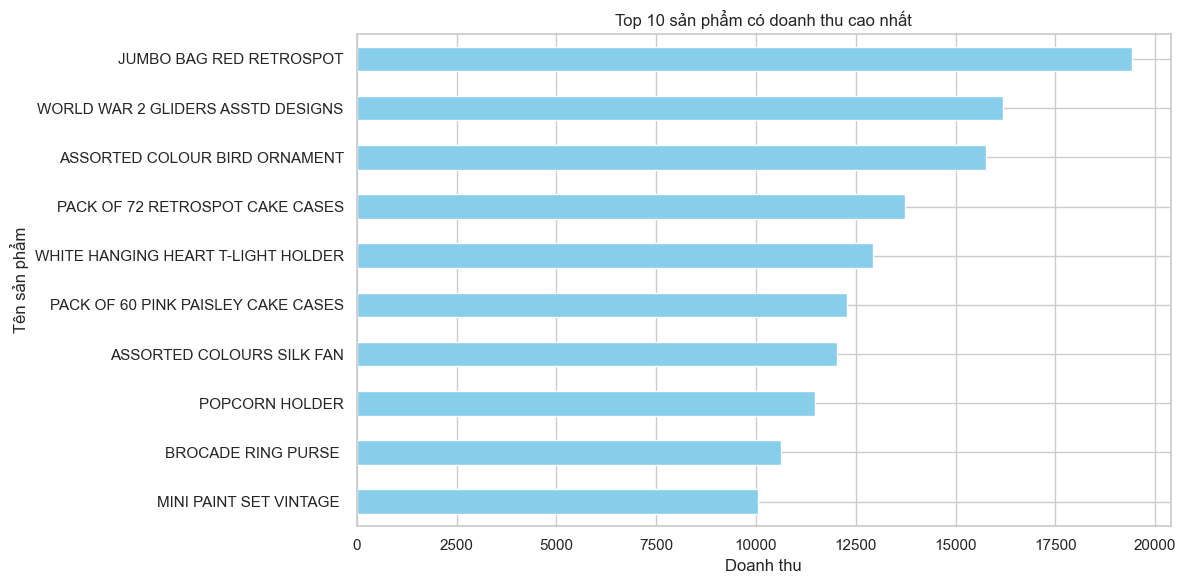

In [10]:
# T√≠nh t·ªïng doanh thu theo t·ª´ng s·∫£n ph·∫©m
product_revenue = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False)

# Bi·ªÉu ƒë·ªì doanh thu top 10 s·∫£n ph·∫©m
op_products = product_revenue.head(10)

plt.figure(figsize=(12, 6))
top_products.plot(kind='barh', color='skyblue')
plt.gca().invert_yaxis()  # ƒê·ªÉ s·∫£n ph·∫©m doanh thu cao nh·∫•t ·ªü tr√™n
plt.xlabel("Doanh thu")
plt.ylabel("T√™n s·∫£n ph·∫©m")
plt.title("Top 10 s·∫£n ph·∫©m c√≥ doanh thu cao nh·∫•t")
plt.tight_layout()
plt.show()

In [11]:
#2.T·∫ßn su·∫•t mua h√†ng trung b√¨nh
#M·ªôt ƒë∆°n h√†ng duy nh·∫•t = m·ªói InvoiceNo v√† CustomerID
orders_per_customer = df.drop_duplicates(subset=["InvoiceNo", "CustomerID"])
frequency = (
    orders_per_customer.groupby("CustomerID")["InvoiceNo"]
    .count()
    .mean()
)
print(f"\nT·∫ßn su·∫•t mua h√†ng trung b√¨nh: {frequency:.2f} ƒë∆°n h√†ng / kh√°ch")


T·∫ßn su·∫•t mua h√†ng trung b√¨nh: 2.66 ƒë∆°n h√†ng / kh√°ch


In [12]:
#3. Gi√° tr·ªã ƒë∆°n h√†ng trung b√¨nh
avg_order_value = df.groupby("InvoiceNo")["TotalPrice"].sum().mean()
print(f"\nGi√° tr·ªã ƒë∆°n h√†ng trung b√¨nh: {avg_order_value:.2f} GBP")


Gi√° tr·ªã ƒë∆°n h√†ng trung b√¨nh: 483.74 GBP


In [13]:
#Ki·ªÉm tra ƒë∆°n h√†ng c√≥ gi√° tr·ªã l·ªõn nh·∫•t
df.groupby("InvoiceNo")["TotalPrice"].sum().max()

38970.0

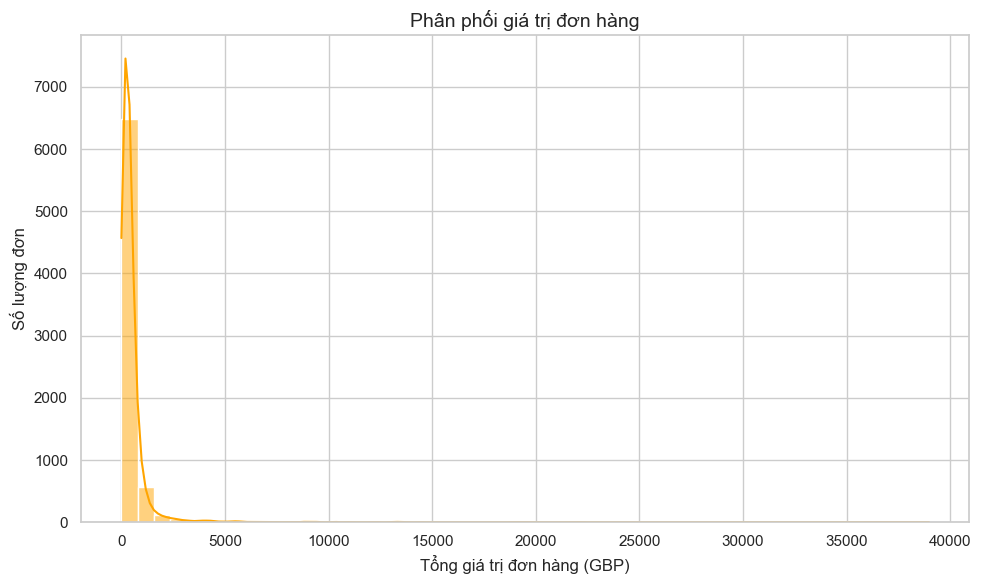

In [14]:
# ----- 2. Bi·ªÉu ƒë·ªì: Ph√¢n ph·ªëi gi√° tr·ªã ƒë∆°n h√†ng -----
order_values = df.groupby("InvoiceNo")["TotalPrice"].sum()

plt.figure(figsize=(10, 6))
sns.histplot(order_values, bins=50, kde=True, color='orange')
plt.title("Ph√¢n ph·ªëi gi√° tr·ªã ƒë∆°n h√†ng", fontsize=14)
plt.xlabel("T·ªïng gi√° tr·ªã ƒë∆°n h√†ng (GBP)")
plt.ylabel("S·ªë l∆∞·ª£ng ƒë∆°n")
plt.tight_layout()
plt.show()

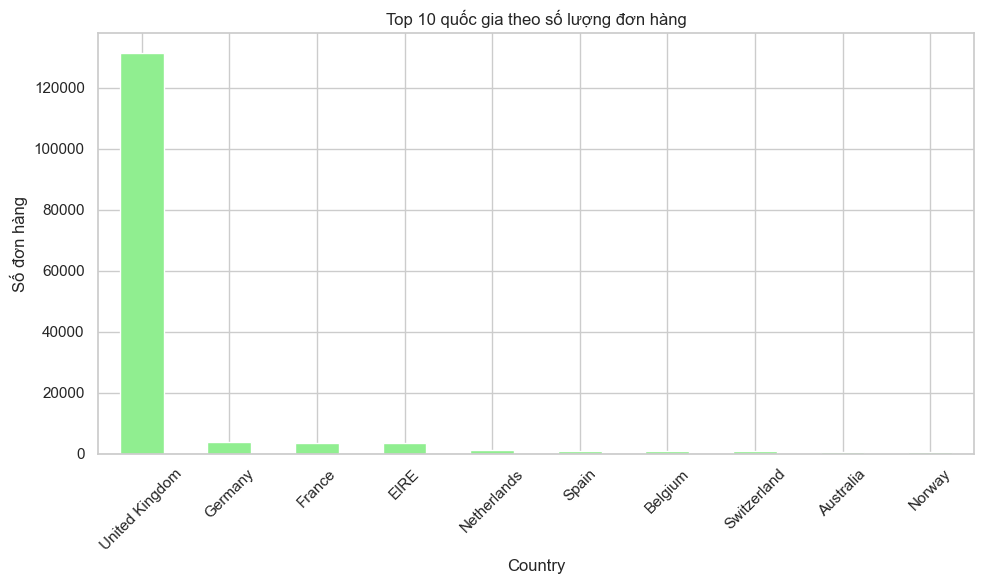

In [15]:
#S·ªë l∆∞·ª£ng ƒë∆°n h√†ng theo qu·ªëc gia
orders_by_country = df['Country'].value_counts().head(10)

plt.figure(figsize=(10,6))
orders_by_country.plot(kind='bar', color='lightgreen')
plt.title('Top 10 qu·ªëc gia theo s·ªë l∆∞·ª£ng ƒë∆°n h√†ng')
plt.ylabel('S·ªë ƒë∆°n h√†ng')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

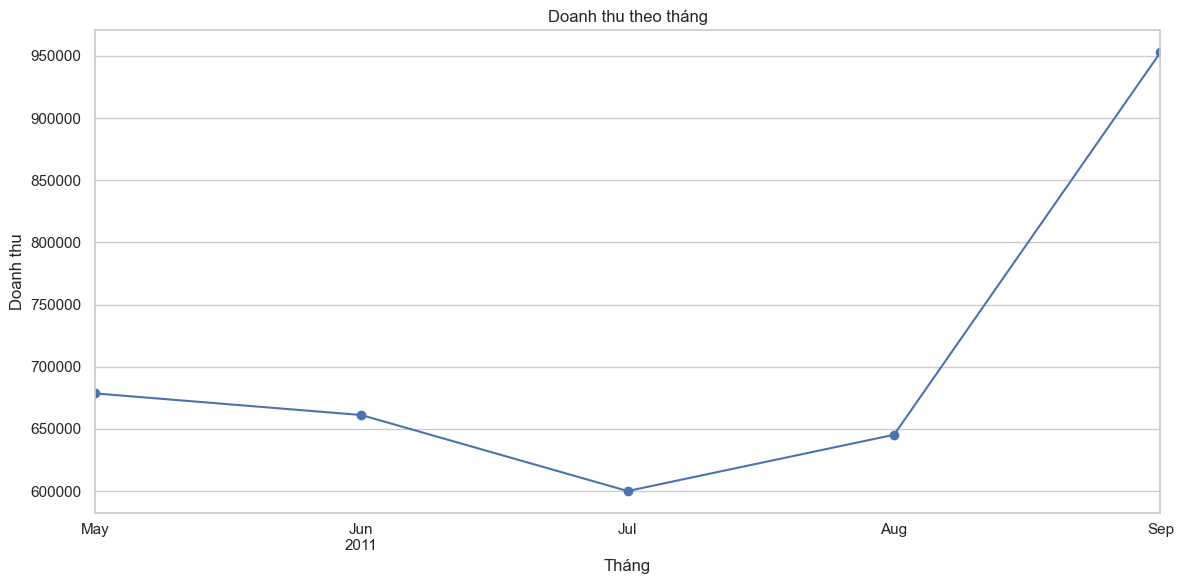

In [16]:
#Doanh thu theo th√°ng
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.to_period('M')

df['Revenue'] = df['Quantity'] * df['UnitPrice']
monthly_revenue = df.groupby('Month')['Revenue'].sum()

plt.figure(figsize=(12,6))
monthly_revenue.plot(marker='o')
plt.title('Doanh thu theo th√°ng')
plt.ylabel('Doanh thu')
plt.xlabel('Th√°ng')
plt.grid(True)
plt.tight_layout()
plt.show()

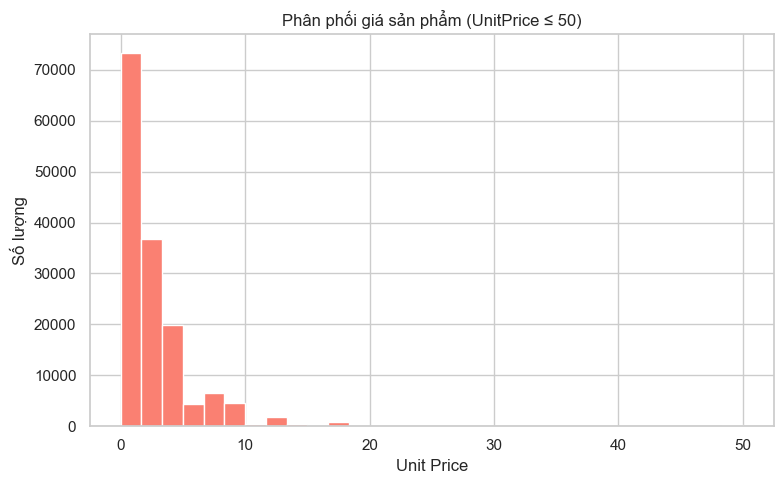

In [17]:
#Ph√¢n ph·ªëi gi√° s·∫£n ph·∫©m
plt.figure(figsize=(8,5))
df['UnitPrice'].clip(upper=50).hist(bins=30, color='salmon')  # Gi·ªõi h·∫°n ƒë·ªÉ tr√°nh outlier
plt.title('Ph√¢n ph·ªëi gi√° s·∫£n ph·∫©m (UnitPrice ‚â§ 50)')
plt.xlabel('Unit Price')
plt.ylabel('S·ªë l∆∞·ª£ng')
plt.tight_layout()
plt.show()

3. X√¢y d·ª±ng recommendation system

In [18]:
#Import data
df = pd.read_csv(r'D:\Data-driven Marketing\Data_G5_Cleaned.csv')
df.head()

InvoiceNo StockCode                        Description  Quantity  \
0     551515     21731      RED TOADSTOOL LED NIGHT LIGHT        12   
1     551515     20749         ASSORTED COLOUR MINI CASES        12   
2     551515     22729        ALARM CLOCK BAKELIKE ORANGE         8   
3     551515     22998       TRAVEL CARD WALLET KEEP CALM        24   
4     551515     22665  RECIPE BOX BLUE SKETCHBOOK DESIGN        24   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  5/1/2011 10:51       1.65       15606  United Kingdom  
1  5/1/2011 10:51       6.35       15606  United Kingdom  
2  5/1/2011 10:51       3.75       15606  United Kingdom  
3  5/1/2011 10:51       0.42       15606  United Kingdom  
4  5/1/2011 10:51       2.55       15606  United Kingdom

In [19]:
#Xay dung customer_item_matrix
customer_item_matrix = df.pivot_table(
 index='CustomerID', 
columns='StockCode', 
values='Quantity',
 aggfunc='sum'
 )
customer_item_matrix.head()

#Chuan hoa ma tran ve 0/1 (0 neu san pham i khong duoc mua boi khach hang j, 1 neu nguoc lai)
customer_item_matrix = customer_item_matrix.applymap(lambda x: 1 if x > 0 else 0)
customer_item_matrix.head()


C:\Users\CPN\AppData\Local\Temp\ipykernel_5780\281231350.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  customer_item_matrix = customer_item_matrix.applymap(lambda x: 1 if x > 0 else 0)


StockCode   10080  10120  10124G  10125  10133  10135  11001  15030  15034  \
CustomerID                                                                   
12347           0      0       0      0      0      0      0      0      0   
12348           0      0       0      0      0      0      0      0      0   
12352           0      0       0      0      0      0      0      0      0   
12353           0      0       0      0      0      0      0      0      0   
12355           0      0       0      0      0      0      0      0      0   

StockCode   15036  ...  90214N  90214P  90214V  90214Y  BANK CHARGES  C2  DOT  \
CustomerID         ...                                                          
12347           0  ...       0       0       0       0             0   0    0   
12348           0  ...       0       0       0       0             0   0    0   
12352           0  ...       0       0       0       0             0   0    0   
12353           0  ...       0       0       0       0             0   0    0   
12355           0  ...       0       0       0       0             0   0    0   

StockCode   M  PADS  POST  
CustomerID                 
12347       0     0     0  
12348       0     0     1  
12352       0     0     1  
12353       0     0     0  
12355       0     0     0  

[5 rows x 3104 columns]

In [20]:
#User_based
#Xay dung ma tran cosine similarity giua cac khach hang
user_user_sim_matrix = pd.DataFrame(
 cosine_similarity(customer_item_matrix)
 )

#rename index va ten cot theo customer_ID
user_user_sim_matrix.columns = customer_item_matrix.index
user_user_sim_matrix['CustomerID'] = customer_item_matrix.index
user_user_sim_matrix = user_user_sim_matrix.set_index('CustomerID')

user_user_sim_matrix.head()

CustomerID     12347     12348     12352     12353     12355     12358  \
CustomerID                                                               
12347       1.000000  0.000000  0.033005  0.000000  0.047565  0.000000   
12348       0.000000  1.000000  0.111111  0.000000  0.160128  0.166667   
12352       0.033005  0.111111  1.000000  0.000000  0.053376  0.055556   
12353       0.000000  0.000000  0.000000  1.000000  0.138675  0.144338   
12355       0.047565  0.160128  0.053376  0.138675  1.000000  0.000000   

CustomerID     12359     12360     12362  12363  ...  18263     18265  18268  \
CustomerID                                       ...                           
12347       0.200125  0.021607  0.135066    0.0  ...    0.0  0.155126    0.0   
12348       0.000000  0.072739  0.064957    0.0  ...    0.0  0.000000    0.0   
12352       0.112287  0.024246  0.108262    0.0  ...    0.0  0.174078    0.0   
12353       0.000000  0.000000  0.000000    0.0  ...    0.0  0.000000    0.0   
12355       0.080911  0.034943  0.062409    0.0  ...    0.0  0.041812    0.0   

CustomerID     18272  18273     18278  18281  18282     18283     18287  
CustomerID                                                               
12347       0.024254    0.0  0.057166    0.0    0.0  0.080312  0.000000  
12348       0.000000    0.0  0.000000    0.0    0.0  0.054074  0.111111  
12352       0.190516    0.0  0.000000    0.0    0.0  0.018025  0.000000  
12353       0.000000    0.0  0.000000    0.0    0.0  0.000000  0.000000  
12355       0.000000    0.0  0.000000    0.0    0.0  0.025976  0.106752  

[5 rows x 2748 columns]

In [21]:
#Item_based
#Tinh ma tran cosine_similarity giua cac item
item_item_sim_matrix = pd.DataFrame(
 cosine_similarity(customer_item_matrix.T)
 )
item_item_sim_matrix.head()

0         1     2         3         4         5         6     7     \
0  1.000000  0.000000   0.0  0.000000  0.033501  0.000000  0.000000   0.0   
1  0.000000  1.000000   0.0  0.000000  0.037037  0.065372  0.069505   0.0   
2  0.000000  0.000000   1.0  0.000000  0.000000  0.000000  0.000000   0.0   
3  0.000000  0.000000   0.0  1.000000  0.024246  0.000000  0.000000   0.0   
4  0.033501  0.037037   0.0  0.024246  1.000000  0.217907  0.046337   0.0   

       8         9     ...  3094  3095  3096  3097  3098      3099  3100  \
0  0.047088  0.026650  ...   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   
1  0.104116  0.000000  ...   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   
2  0.000000  0.000000  ...   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   
3  0.000000  0.038576  ...   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   
4  0.069411  0.049105  ...   0.0   0.0   0.0   0.0   0.0  0.059391   0.0   

       3101  3102      3103  
0  0.000000   0.0  0.000000  
1  0.083333   0.0  0.000000  
2  0.000000   0.0  0.000000  
3  0.054554   0.0  0.030045  
4  0.041667   0.0  0.022948  

[5 rows x 3104 columns]

In [22]:
#rename index va ten cot theo stock_code
item_item_sim_matrix.columns = customer_item_matrix.T.index
item_item_sim_matrix['StockCode'] = customer_item_matrix.T.index
item_item_sim_matrix = item_item_sim_matrix.set_index('StockCode')
item_item_sim_matrix.head()

StockCode     10080     10120  10124G     10125     10133     10135     11001  \
StockCode                                                                       
10080      1.000000  0.000000     0.0  0.000000  0.033501  0.000000  0.000000   
10120      0.000000  1.000000     0.0  0.000000  0.037037  0.065372  0.069505   
10124G     0.000000  0.000000     1.0  0.000000  0.000000  0.000000  0.000000   
10125      0.000000  0.000000     0.0  1.000000  0.024246  0.000000  0.000000   
10133      0.033501  0.037037     0.0  0.024246  1.000000  0.217907  0.046337   

StockCode  15030     15034     15036  ...  90214N  90214P  90214V  90214Y  \
StockCode                             ...                                   
10080        0.0  0.047088  0.026650  ...     0.0     0.0     0.0     0.0   
10120        0.0  0.104116  0.000000  ...     0.0     0.0     0.0     0.0   
10124G       0.0  0.000000  0.000000  ...     0.0     0.0     0.0     0.0   
10125        0.0  0.000000  0.038576  ...     0.0     0.0     0.0     0.0   
10133        0.0  0.069411  0.049105  ...     0.0     0.0     0.0     0.0   

StockCode  BANK CHARGES        C2  DOT         M  PADS      POST  
StockCode                                                         
10080               0.0  0.000000  0.0  0.000000   0.0  0.000000  
10120               0.0  0.000000  0.0  0.083333   0.0  0.000000  
10124G              0.0  0.000000  0.0  0.000000   0.0  0.000000  
10125               0.0  0.000000  0.0  0.054554   0.0  0.030045  
10133               0.0  0.059391  0.0  0.041667   0.0  0.022948  

[5 rows x 3104 columns]

In [23]:
# ====== 1. Chuy·ªÉn v·ªÅ numpy ======
user_item_np = customer_item_matrix.to_numpy()
user_sim_np = user_user_sim_matrix.to_numpy()
item_sim_np = item_item_sim_matrix.to_numpy()

user_ids = customer_item_matrix.index
item_ids = customer_item_matrix.columns

k = 5  # S·ªë l∆∞·ª£ng h√†ng x√≥m g·∫ßn nh·∫•t

# ====== 2. User-based top-k weighted score ======
topk_user_sim = np.zeros_like(user_sim_np)
for i in range(user_sim_np.shape[0]):
    top_k_idx = np.argsort(-user_sim_np[i])[:k+1]
    top_k_idx = top_k_idx[top_k_idx != i]  # Lo·∫°i ch√≠nh n√≥
    topk_user_sim[i, top_k_idx] = user_sim_np[i, top_k_idx]

user_based_score_np = np.dot(topk_user_sim, user_item_np)
user_sim_sums = np.sum(topk_user_sim, axis=1).reshape(-1, 1)
user_based_score_np = np.divide(user_based_score_np, user_sim_sums, where=user_sim_sums != 0)

# ====== 3. Item-based top-k weighted score ======
topk_item_sim = np.zeros_like(item_sim_np)
for i in range(item_sim_np.shape[0]):
    top_k_idx = np.argsort(-item_sim_np[i])[:k+1]
    top_k_idx = top_k_idx[top_k_idx != i]  # Lo·∫°i ch√≠nh n√≥
    topk_item_sim[i, top_k_idx] = item_sim_np[i, top_k_idx]

item_based_score_np = np.dot(user_item_np, topk_item_sim)
item_sim_sums = np.sum(topk_item_sim, axis=1).reshape(1, -1)
item_based_score_np = np.divide(item_based_score_np, item_sim_sums, where=item_sim_sums != 0)

# ====== 4. Chuy·ªÉn l·∫°i v·ªÅ DataFrame ======
user_based_score = pd.DataFrame(user_based_score_np, index=user_ids, columns=item_ids)
item_based_score = pd.DataFrame(item_based_score_np, index=user_ids, columns=item_ids)

# ====== 5. Lo·∫°i b·ªè s·∫£n ph·∫©m ƒë√£ mua ======
user_based_score[customer_item_matrix > 0] = 0
item_based_score[customer_item_matrix > 0] = 0


In [24]:
user_based_score

StockCode   10080  10120  10124G  10125  10133     10135  11001  15030  15034  \
CustomerID                                                                      
12347         0.0    0.0     0.0    0.0    0.0  0.000000    0.0    0.0    0.0   
12348         0.0    0.0     0.0    0.0    0.0  0.000000    0.0    0.0    0.0   
12352         0.0    0.0     0.0    0.0    0.0  0.000000    0.0    0.0    0.0   
12353         0.0    0.0     0.0    0.0    0.0  0.000000    0.0    0.0    0.0   
12355         0.0    0.0     0.0    0.0    0.0  0.000000    0.0    0.0    0.0   
...           ...    ...     ...    ...    ...       ...    ...    ...    ...   
18278         0.0    0.0     0.0    0.0    0.0  0.199319    0.0    0.0    0.0   
18281         0.0    0.0     0.0    0.0    0.0  0.000000    0.0    0.0    0.0   
18282         0.0    0.0     0.0    0.0    0.0  0.000000    0.0    0.0    0.0   
18283         0.0    0.0     0.0    0.0    0.0  0.000000    0.0    0.0    0.0   
18287         0.0    0.0     0.0    0.0    0.0  0.000000    0.0    0.0    0.0   

StockCode      15036  ...  90214N  90214P  90214V  90214Y  BANK CHARGES   C2  \
CustomerID            ...                                                      
12347       0.000000  ...     0.0     0.0     0.0     0.0           0.0  0.0   
12348       0.000000  ...     0.0     0.0     0.0     0.0           0.0  0.0   
12352       0.000000  ...     0.0     0.0     0.0     0.0           0.0  0.0   
12353       0.000000  ...     0.0     0.0     0.0     0.0           0.0  0.0   
12355       0.000000  ...     0.0     0.0     0.0     0.0           0.0  0.0   
...              ...  ...     ...     ...     ...     ...           ...  ...   
18278       0.000000  ...     0.0     0.0     0.0     0.0           0.0  0.0   
18281       0.000000  ...     0.0     0.0     0.0     0.0           0.0  0.0   
18282       0.000000  ...     0.0     0.0     0.0     0.0           0.0  0.0   
18283       0.000000  ...     0.0     0.0     0.0     0.0           0.0  0.0   
18287       0.176282  ...     0.0     0.0     0.0     0.0           0.0  0.0   

StockCode   DOT         M  PADS      POST  
CustomerID                                 
12347       0.0  0.192842   0.0  0.000000  
12348       0.0  0.000000   0.0  0.000000  
12352       0.0  0.000000   0.0  0.000000  
12353       0.0  0.000000   0.0  0.165958  
12355       0.0  0.000000   0.0  0.000000  
...         ...       ...   ...       ...  
18278       0.0  0.000000   0.0  0.000000  
18281       0.0  0.000000   0.0  0.393343  
18282       0.0  0.000000   0.0  0.000000  
18283       0.0  0.000000   0.0  0.000000  
18287       0.0  0.000000   0.0  0.000000  

[2748 rows x 3104 columns]

In [25]:
item_based_score

StockCode   10080  10120  10124G  10125  10133  10135     11001  15030  15034  \
CustomerID                                                                      
12347         0.0    0.0     0.0    0.0    0.0    0.0  0.191184    0.0    0.0   
12348         0.0    0.0     0.0    0.0    0.0    0.0  0.000000    0.0    0.0   
12352         0.0    0.0     0.0    0.0    0.0    0.0  0.000000    0.0    0.0   
12353         0.0    0.0     0.0    0.0    0.0    0.0  0.000000    0.0    0.0   
12355         0.0    0.0     0.0    0.0    0.0    0.0  0.152147    0.0    0.0   
...           ...    ...     ...    ...    ...    ...       ...    ...    ...   
18278         0.0    0.0     0.0    0.0    0.0    0.0  0.000000    0.0    0.0   
18281         0.0    0.0     0.0    0.0    0.0    0.0  0.000000    0.0    0.0   
18282         0.0    0.0     0.0    0.0    0.0    0.0  0.000000    0.0    0.0   
18283         0.0    0.0     0.0    0.0    0.0    0.0  0.000000    0.0    0.0   
18287         0.0    0.0     0.0    0.0    0.0    0.0  0.000000    0.0    0.0   

StockCode   15036  ...  90214N  90214P  90214V  90214Y  BANK CHARGES   C2  \
CustomerID         ...                                                      
12347         0.0  ...     0.0     0.0     0.0     0.0           0.0  0.0   
12348         0.0  ...     0.0     0.0     0.0     0.0           0.0  0.0   
12352         0.0  ...     0.0     0.0     0.0     0.0           0.0  0.0   
12353         0.0  ...     0.0     0.0     0.0     0.0           0.0  0.0   
12355         0.0  ...     0.0     0.0     0.0     0.0           0.0  0.0   
...           ...  ...     ...     ...     ...     ...           ...  ...   
18278         0.0  ...     0.0     0.0     0.0     0.0           0.0  0.0   
18281         0.0  ...     0.0     0.0     0.0     0.0           0.0  0.0   
18282         0.0  ...     0.0     0.0     0.0     0.0           0.0  0.0   
18283         0.0  ...     0.0     0.0     0.0     0.0           0.0  0.0   
18287         0.0  ...     0.0     0.0     0.0     0.0           0.0  0.0   

StockCode   DOT    M  PADS      POST  
CustomerID                            
12347       0.0  0.0   0.0  0.000000  
12348       0.0  0.0   0.0  0.000000  
12352       0.0  0.0   0.0  0.000000  
12353       0.0  0.0   0.0  0.000000  
12355       0.0  0.0   0.0  0.000000  
...         ...  ...   ...       ...  
18278       0.0  0.0   0.0  0.000000  
18281       0.0  0.0   0.0  0.000000  
18282       0.0  0.0   0.0  0.000000  
18283       0.0  0.0   0.0  0.240829  
18287       0.0  0.0   0.0  0.000000  

[2748 rows x 3104 columns]

In [26]:
def recommend_top_5_distinct(user_id, top_n_each=5):
    if user_id not in customer_item_matrix.index:
        return {'user_based': [], 'item_based': []}

    # L·∫•y top_n_each t·ª´ user-based
    top_user = user_based_score.loc[user_id].sort_values(ascending=False).head(top_n_each).index.tolist()

    # L·∫•y top_n_each t·ª´ item-based, lo·∫°i b·ªè tr√πng v·ªõi user-based
    item_scores = item_based_score.loc[user_id].drop(index=top_user, errors='ignore')
    top_item = item_scores.sort_values(ascending=False).head(top_n_each).index.tolist()

    # N·∫øu item-based sau khi lo·∫°i tr√πng c√≤n √≠t h∆°n 5 ‚Üí b·ªï sung t·ª´ to√†n b·ªô danh s√°ch
    if len(top_item) < top_n_each:
        remaining = top_n_each - len(top_item)
        all_items = item_based_score.columns.difference(top_user + top_item)
        filler = item_based_score.loc[user_id, all_items].sort_values(ascending=False).head(remaining).index.tolist()
        top_item += filler

    return {
        'user_based': top_user,
        'item_based': top_item
    }

def print_recommendations_distinct(user_id, df, top_n_each=5):
    if user_id not in customer_item_matrix.index:
        print(f"‚ö†Ô∏è Kh√°ch h√†ng '{user_id}' kh√¥ng t·ªìn t·∫°i trong d·ªØ li·ªáu. Vui l√≤ng ki·ªÉm tra l·∫°i.")
        return

    recs = recommend_top_5_distinct(user_id, top_n_each)

    print(f"\nüìå G·ª£i √Ω cho kh√°ch h√†ng {user_id} (kh√¥ng tr√πng s·∫£n ph·∫©m):")

    print("\nüîµ User-based:")
    for code in recs['user_based']:
        desc = df[df['StockCode'] == code]['Description'].dropna().unique()
        name = desc[0] if len(desc) > 0 else 'Unknown'
        print(f"  - {code}: {name}")

    print("\nüü¢ Item-based:")
    for code in recs['item_based']:
        desc = df[df['StockCode'] == code]['Description'].dropna().unique()
        name = desc[0] if len(desc) > 0 else 'Unknown'
        print(f"  - {code}: {name}")


In [27]:
print_recommendations_distinct(17935,df)


üìå G·ª£i √Ω cho kh√°ch h√†ng 17935 (kh√¥ng tr√πng s·∫£n ph·∫©m):

üîµ User-based:
  - 22383: LUNCH BAG SUKI DESIGN 
  - 21770: OPEN CLOSED METAL SIGN
  - 22662: LUNCH BAG DOLLY GIRL DESIGN
  - 22382: LUNCH BAG SPACEBOY DESIGN 
  - 85099C: JUMBO  BAG BAROQUE BLACK WHITE

üü¢ Item-based:
  - 22554: PLASTERS IN TIN WOODLAND ANIMALS
  - 22757: LARGE RED BABUSHKA NOTEBOOK 
  - 22758: LARGE PURPLE BABUSHKA NOTEBOOK  
  - 20996: JAZZ HEARTS ADDRESS BOOK
  - 22555: PLASTERS IN TIN STRONGMAN


4. V·∫Ω bi·ªÉu ƒë·ªì m·∫°ng c√°c s·∫£n ph·∫©m ƒëi k√®m

In [28]:

import networkx as nx
import plotly.graph_objects as go


In [29]:
#Bi·ªÉu ƒë·ªì m·∫°ng d·ª±a tr√™n item-item matrix
# T·∫°o ƒë·ªì th·ªã
G = nx.Graph()
threshold = 0.5

# Duy·ªát qua ma tr·∫≠n similarity
for i in item_item_sim_matrix.index:
    G.add_node(i)
    for j in item_item_sim_matrix.columns:
        if i != j and item_item_sim_matrix.loc[i, j] > threshold:
            G.add_edge(i, j, weight=item_item_sim_matrix.loc[i, j])

# Layout
pos = nx.spring_layout(G, seed=42)

# C·∫°nh
edge_x, edge_y = [], []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x += [x0, x1, None]
    edge_y += [y0, y1, None]

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines'
)

# H√†m l·∫•y m√¥ t·∫£ s·∫£n ph·∫©m
desc_dict = df.set_index('StockCode')['Description'].to_dict()

# N√∫t
node_x, node_y, hover_texts = [], [], []

for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)

    # L·∫•y m√¥ t·∫£ s·∫£n ph·∫©m
    desc = desc_dict.get(node, 'Kh√¥ng r√µ m√¥ t·∫£')

    # L·∫•y c√°c s·∫£n ph·∫©m t∆∞∆°ng t·ª± g·∫ßn nh·∫•t
    similar_items = item_item_sim_matrix.loc[node].sort_values(ascending=False)
    similar_items = similar_items[similar_items.index != node]
    top_similar = similar_items.head(3).index.tolist()
    
    # Th√™m m√¥ t·∫£ cho hover
    similar_desc = [f"{code} - {desc_dict.get(code, 'Kh√¥ng r√µ')}" for code in top_similar]
    hover_text = f"<b>{node}</b>: {desc}<br>G·∫ßn gi·ªëng v·ªõi:<br>" + "<br>".join(similar_desc)
    hover_texts.append(hover_text)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    text=hover_texts,
    marker=dict(size=10, color='blue', line_width=2)
)

# Bi·ªÉu ƒë·ªì
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title=dict(text='Bi·ªÉu ƒë·ªì m·∫°ng s·∫£n ph·∫©m (Cosine Similarity)', font=dict(size=16)),
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20, l=5, r=5, t=40),
                    xaxis=dict(showgrid=False, zeroline=False),
                    yaxis=dict(showgrid=False, zeroline=False))
               )

# Xu·∫•t ra HTML
fig.write_html("network_graph.html")